<a href="https://colab.research.google.com/github/trilgar/MSM-2021/blob/main/lab_1_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [20]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200, 10)
        

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.log_softmax(self.fc2(out))
        return out

In [21]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(6 * 6 * 128, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [22]:
test_numbers = np.zeros((10, 28 ,28))
for i in range(0, 10):
  image = plt.imread("/content/drive/MyDrive/numbers datasets/"+str(i)+".png")
  test_numbers[i] = image
test_numbers = 1 - test_numbers

## Персептрон на невідомих даних:

In [23]:
model = Perceptron()
model.load_state_dict(torch.load('/content/drive/MyDrive/numbers datasets/perceptron_model.ckpt'))
model.eval()
model.double()

Perceptron(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

In [24]:
# _, predicted = torch.max(output.data, 1)

predicted:  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


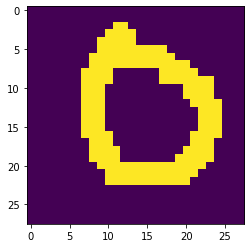

predicted:  2


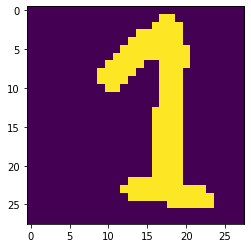

predicted:  2


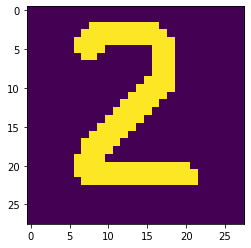

predicted:  3


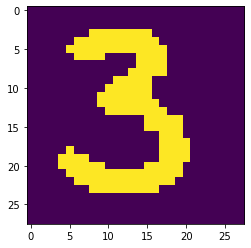

predicted:  4


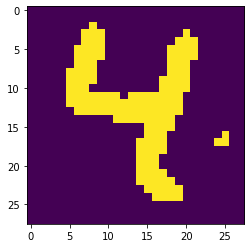

predicted:  3


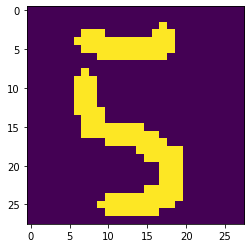

predicted:  5


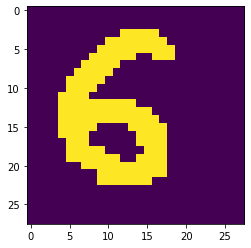

predicted:  7


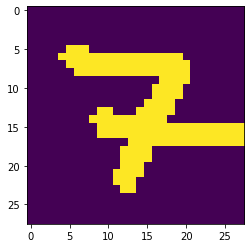

predicted:  6


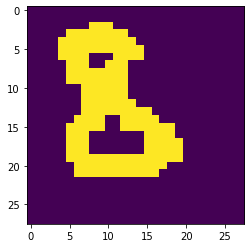

predicted:  3


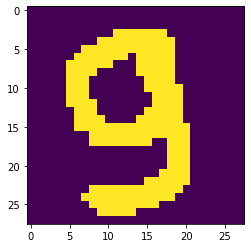

Correct :  5 / 10


In [25]:
correct = 0
for number,img in enumerate(test_numbers):
  image = torch.tensor(img)
  image = image.view(-1, 28*28)
  output = model(image)
  _, predicted = torch.max(output.data, 1)
  if(predicted == number):
    correct += 1
  print('predicted: ', predicted.item())
  plt.imshow(img)
  plt.show()
print('Correct : ', correct, '/', '10')

## Згорткова мережа

In [26]:
model = ConvNet()
model.load_state_dict(torch.load('/content/drive/MyDrive/numbers datasets/conv_net_model.ckpt'))
model.eval()
model.double()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4608, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)

predicted:  0


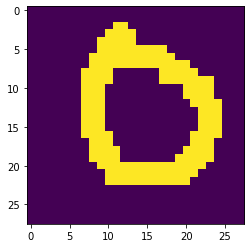

predicted:  2


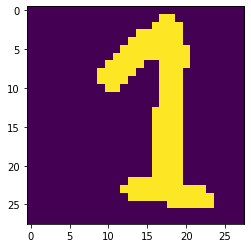

predicted:  2


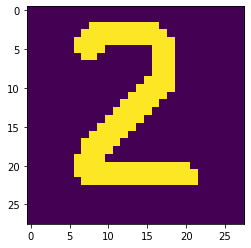

predicted:  3


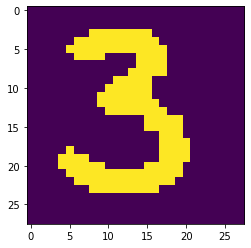

predicted:  4


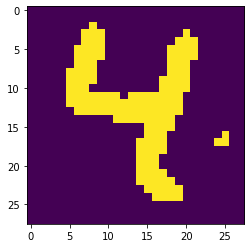

predicted:  5


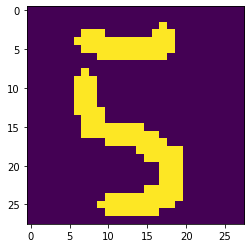

predicted:  6


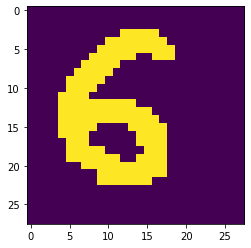

predicted:  7


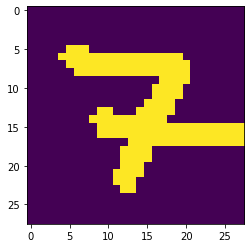

predicted:  8


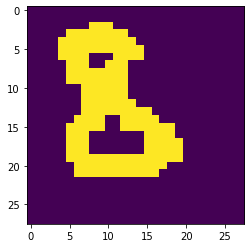

predicted:  3


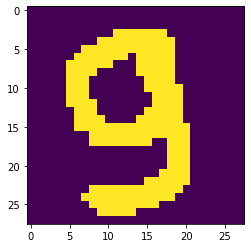

Correct :  8 / 10


In [27]:
correct = 0
for number,img in enumerate(test_numbers):
  image = torch.tensor(img)
  image = image.unsqueeze(0) 
  image = image.unsqueeze(0) 
  output = model(image)
  _, predicted = torch.max(output.data, 1)
  if(predicted == number):
    correct += 1
  print('predicted: ', predicted.item())
  plt.imshow(img)
  plt.show()
print('Correct : ', correct, '/', '10')